In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/numpym/label.npy
/kaggle/input/numpym/feature.npy
/kaggle/input/helalke/label1.npy
/kaggle/input/helalke/feature1.npy
/kaggle/input/aslanm/final_listed.csv


In [12]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [13]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd

In [14]:
import os
import librosa
import librosa.display
import glob 
import skimage

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [16]:
from numpy import load
X=load("../input/numpym/feature.npy")
y=load("../input/numpym/label.npy")
y.shape,X.shape

((8722,), (8722, 128))

In [17]:
from numpy import load
X1=load("../input/helalke/feature1.npy")
y1=load("../input/helalke/label1.npy")
print(y1.shape,X1.shape)

(8722,) (8722, 128, 173)


In [18]:
#X_train.shape,X_test.shape

# Zaman dahil edilen tanh ve Y categorical model

In [19]:
Y = to_categorical(y1)
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, random_state = 1)
print(X_train.shape,X_test.shape)
X_train=X_train.reshape((6541, 128,173,1))
X_test=X_test.reshape((2181, 128,173,1))
print(X_train.shape,Y_test.shape)
input_dim=(128,173, 1)
X_train,X_test=X_train/255.0,X_test/255.0
X_val=X_test[:1091]
X_test=X_test[1091:]
Y_val=Y_test[:1091]
Y_test=Y_test[1091:]
print(Y_val.shape,Y_test.shape,X_test.shape,X_val.shape)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh"))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = "tanh"))
model.add(Dropout(0.5))
model.add(Dense(512, activation = "tanh"))
model.add(Dropout(0.7))
model.add(Dense(512, activation = "tanh"))
model.add(Dropout(0.8))
model.add(Dense(256, activation = "tanh"))
model.add(Dropout(0.8))
model.add(Dense(256, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history=model.fit(X_train, Y_train, epochs = 90, batch_size = 50, validation_data = (X_val, Y_val))

(6541, 128, 173) (2181, 128, 173)
(6541, 128, 173, 1) (2181, 10)
(1091, 10) (1090, 10) (1090, 128, 173, 1) (1091, 128, 173, 1)


2022-10-07 09:47:04.282362: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 09:47:04.384280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 09:47:04.385090: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 09:47:04.386353: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/90


2022-10-07 09:47:09.844754: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


131/131 [==============================] - 15s 58ms/step - loss: 2.5702 - accuracy: 0.1108 - val_loss: 2.4005 - val_accuracy: 0.1137
Epoch 2/90
131/131 [==============================] - 7s 51ms/step - loss: 2.4260 - accuracy: 0.1186 - val_loss: 2.3426 - val_accuracy: 0.1283
Epoch 3/90
131/131 [==============================] - 7s 51ms/step - loss: 2.4065 - accuracy: 0.1108 - val_loss: 2.3118 - val_accuracy: 0.1100
Epoch 4/90
131/131 [==============================] - 7s 51ms/step - loss: 2.3781 - accuracy: 0.1170 - val_loss: 2.3526 - val_accuracy: 0.0999
Epoch 5/90
131/131 [==============================] - 7s 51ms/step - loss: 2.3746 - accuracy: 0.1066 - val_loss: 2.3387 - val_accuracy: 0.1100
Epoch 6/90
131/131 [==============================] - 7s 51ms/step - loss: 2.3553 - accuracy: 0.1140 - val_loss: 2.3221 - val_accuracy: 0.0999
Epoch 7/90
131/131 [==============================] - 7s 51ms/step - loss: 2.3443 - accuracy: 0.1133 - val_loss: 2.2898 - val_accuracy: 0.1137
Epoch 8/9

In [20]:
_,accuracy=model.evaluate(X_test,Y_test)
print("Accuracy:%.2f"%(accuracy*100))

35/35 [==============================] - 1s 13ms/step - loss: 2.2950 - accuracy: 0.1147
Accuracy:11.47


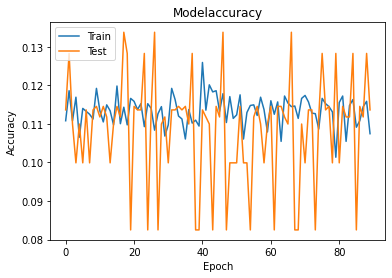

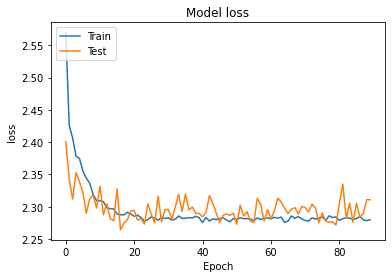

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()
#birinci grafik başarı 
#ikinci hata

# Zaman dahil edilen ve Y yalnızca düz label olan model

In [22]:
train_images, test_images, train_labels, test_labels = train_test_split(X1, y1, random_state = 1)
train_images=train_images.reshape((6541, 128,173,1))
test_images=test_images.reshape((2181, 128,173,1))
print(train_labels.shape,test_labels.shape)
input_dim=(128,173,1)

(6541,) (2181,)


In [23]:

train_images,test_images=train_images/255.0,test_images/255.0
val_images=test_images[:1091]
test_images=test_images[1091:]
val_labels=test_labels[:1091]
test_labels=test_labels[1091:]
print(Y_val.shape,Y_test.shape,X_test.shape,X_val.shape)
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(32,(3,3),activation="tanh",input_shape=input_dim),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                           tf.keras.layers.MaxPool2D(16,16),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dropout(0.25),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation="relu"),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation="relu"),
                           tf.keras.layers.Dense(512,activation="relu"),
                           tf.keras.layers.Dropout(0.7),
                           tf.keras.layers.Dense(256,activation="relu"),
                           tf.keras.layers.Dropout(0.8),
                           tf.keras.layers.Dense(256,activation="relu"),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense(10,activation="softmax")]) 
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01,momentum=0.9),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(train_images,train_labels,batch_size=50,epochs=150,verbose=1,validation_data=(val_images,val_labels))


(1091, 10) (1090, 10) (1090, 128, 173, 1) (1091, 128, 173, 1)


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2022-10-07 09:57:20.627742: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 579375616 exceeds 10% of free system memory.
2022-10-07 09:57:21.266984: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 579375616 exceeds 10% of free system memory.


Epoch 1/150
131/131 [==============================] - 6s 39ms/step - loss: 2.5611 - accuracy: 0.1353 - val_loss: 2.2904 - val_accuracy: 0.1338
Epoch 2/150
131/131 [==============================] - 4s 34ms/step - loss: 2.3770 - accuracy: 0.1426 - val_loss: 2.2996 - val_accuracy: 0.0898
Epoch 3/150
131/131 [==============================] - 4s 33ms/step - loss: 2.2927 - accuracy: 0.1593 - val_loss: 2.3192 - val_accuracy: 0.1118
Epoch 4/150
131/131 [==============================] - 4s 33ms/step - loss: 2.1866 - accuracy: 0.1969 - val_loss: 2.3637 - val_accuracy: 0.1283
Epoch 5/150
131/131 [==============================] - 4s 34ms/step - loss: 2.1178 - accuracy: 0.2205 - val_loss: 2.3855 - val_accuracy: 0.1384
Epoch 6/150
131/131 [==============================] - 4s 34ms/step - loss: 2.0320 - accuracy: 0.2524 - val_loss: 2.4197 - val_accuracy: 0.1467
Epoch 7/150
131/131 [==============================] - 4s 34ms/step - loss: 1.9852 - accuracy: 0.2698 - val_loss: 2.4070 - val_accuracy:

In [24]:
_,accuracy=model.evaluate(test_images,test_labels)
print("Accuracy:%.2f"%(accuracy*100))

35/35 [==============================] - 0s 9ms/step - loss: 1.3760 - accuracy: 0.6321
Accuracy:63.21


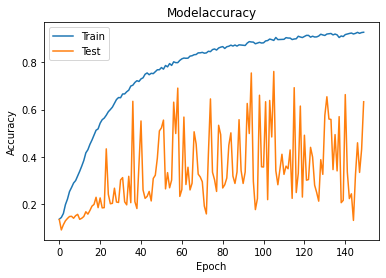

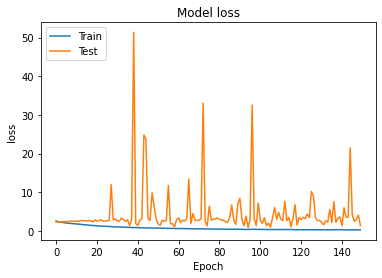

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show() 
#birinci grafik başarı 
#ikinci hata

# Zaman dahil edilmeyen ve Y categorical olan model

In [26]:
Y = to_categorical(y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)
X_train=X_train.reshape((6541, 16,8,1))
X_test=X_test.reshape((2181, 16,8,1))
print(X_train.shape,Y_test.shape)
input_dim=(16,8, 1)
X_train,X_test=X_train/255.0,X_test/255.0
X_val=X_test[:1091]
X_test=X_test[1091:]
Y_val=Y_test[:1091]
Y_test=Y_test[1091:]
print(Y_val.shape,Y_test.shape,X_test.shape,X_val.shape)
model = Sequential()
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(4096, activation = "tanh"))
model.add(Dense(2048, activation = "tanh"))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(1024, activation = "tanh"))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dropout(0.4))
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history=model.fit(X_train, Y_train, epochs = 300, batch_size = 50, validation_data = (X_val, Y_val))

(6541, 16, 8, 1) (2181, 10)
(1091, 10) (1090, 10) (1090, 16, 8, 1) (1091, 16, 8, 1)
Epoch 1/300
131/131 [==============================] - 1s 6ms/step - loss: 2.2049 - accuracy: 0.2030 - val_loss: 2.0674 - val_accuracy: 0.2603
Epoch 2/300
131/131 [==============================] - 1s 5ms/step - loss: 2.0031 - accuracy: 0.2752 - val_loss: 1.8861 - val_accuracy: 0.3217
Epoch 3/300
131/131 [==============================] - 1s 4ms/step - loss: 1.8633 - accuracy: 0.3359 - val_loss: 1.7908 - val_accuracy: 0.3410
Epoch 4/300
131/131 [==============================] - 1s 4ms/step - loss: 1.7816 - accuracy: 0.3665 - val_loss: 1.6937 - val_accuracy: 0.3987
Epoch 5/300
131/131 [==============================] - 1s 5ms/step - loss: 1.7017 - accuracy: 0.3938 - val_loss: 1.6647 - val_accuracy: 0.4180
Epoch 6/300
131/131 [==============================] - 1s 5ms/step - loss: 1.6055 - accuracy: 0.4302 - val_loss: 1.5219 - val_accuracy: 0.4684
Epoch 7/300
131/131 [==============================] - 1s 

In [27]:
_,accuracy=model.evaluate(X_test,Y_test)
print("Accuracy:%.2f"%(accuracy*100))

35/35 [==============================] - 0s 3ms/step - loss: 1.0224 - accuracy: 0.7303
Accuracy:73.03


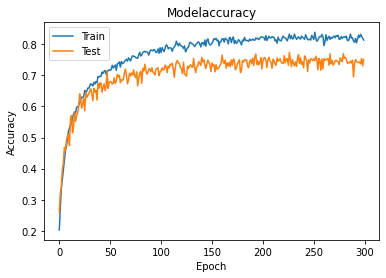

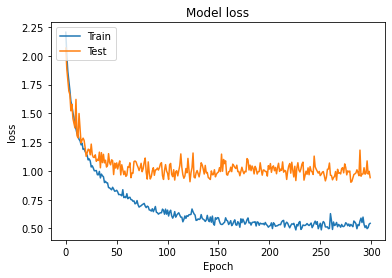

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()
#birinci grafik başarı 
#ikinci hata

# Zaman dahil edilmeyen ve Y categorical model

In [29]:
train_images, test_images, train_labels, test_labels = train_test_split(X, y, random_state = 1)
train_images=train_images.reshape((6541, 16,8,1))
test_images=test_images.reshape((2181, 16,8,1))
train_images,test_images=train_images/255.0,test_images/255.0
val_images=test_images[:1091]
test_images=test_images[1091:]
val_labels=test_labels[:1091]
test_labels=test_labels[1091:]
input_dim=(16,8, 1)
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(32,(3,3),activation="tanh",input_shape=input_dim),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dropout(0.25),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(256,activation="relu"),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(256,activation="relu"),
                           tf.keras.layers.Dense(256,activation="relu"),
                           tf.keras.layers.Dropout(0.7),
                           tf.keras.layers.Dense(128,activation="relu"),
                           tf.keras.layers.Dropout(0.8),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense(10,activation="softmax")]) 
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01,momentum=0.9),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(train_images,train_labels,batch_size=32,epochs=150,verbose=1,validation_data=(val_images,val_labels))


Epoch 1/150
205/205 [==============================] - 2s 5ms/step - loss: 2.4822 - accuracy: 0.1240 - val_loss: 2.2716 - val_accuracy: 0.0862
Epoch 2/150
205/205 [==============================] - 1s 4ms/step - loss: 2.2949 - accuracy: 0.1316 - val_loss: 2.2728 - val_accuracy: 0.1430
Epoch 3/150
205/205 [==============================] - 1s 4ms/step - loss: 2.2714 - accuracy: 0.1350 - val_loss: 2.2301 - val_accuracy: 0.1732
Epoch 4/150
205/205 [==============================] - 1s 4ms/step - loss: 2.2546 - accuracy: 0.1466 - val_loss: 2.2278 - val_accuracy: 0.1650
Epoch 5/150
205/205 [==============================] - 1s 4ms/step - loss: 2.2246 - accuracy: 0.1686 - val_loss: 2.2242 - val_accuracy: 0.1787
Epoch 6/150
205/205 [==============================] - 1s 5ms/step - loss: 2.1963 - accuracy: 0.1749 - val_loss: 2.1627 - val_accuracy: 0.1907
Epoch 7/150
205/205 [==============================] - 1s 4ms/step - loss: 2.1916 - accuracy: 0.1816 - val_loss: 2.2664 - val_accuracy: 0.1567

In [30]:
_,accuracy=model.evaluate(test_images,test_labels)
print("Accuracy:%.2f"%(accuracy*100))

35/35 [==============================] - 0s 3ms/step - loss: 2.2411 - accuracy: 0.1431
Accuracy:14.31


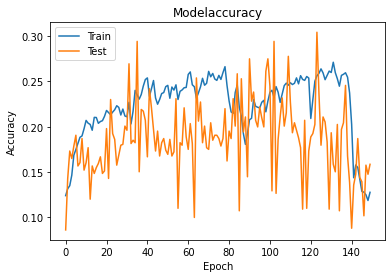

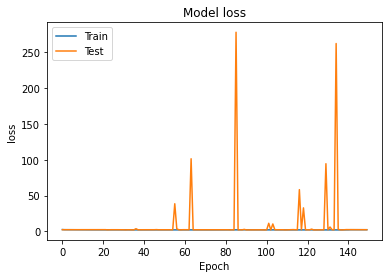

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show() 
#birinci grafik başarı 
#ikinci hata